In [269]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, TimeSeriesOutcome, IntegerParameter, RealParameter)

from dike_model_function_V2_0 import (DikeNetwork,DikeNetworkTS)  # @UnresolvedImport
from problem_formulation_V2_0 import get_model_for_actor_problem_formulation

In [270]:
# Problem formulations:
#    get_model_for_actor_problem_formulation(problem_formulation_id, outcome_type='time_series')
#    problem_formulation_id options
#        1 - RWS (GOOD)
#        2 - Environmental interest group
#        3 - Transport company 
#        4 - Delta commission
#        5 - Gelderland (GOOD)
#        6 - Overijssel (GOOD)s
#        7 - Dike rings 1 and 2
#        8 - Dike ring 3
#        9 - Dike ring 4
#        10 - Dike ring 5
#
#    outcome_type options
#        'time_series' (default)
#        'scalar'


model, planning_steps = get_model_for_actor_problem_formulation(1,outcome_type='scalar')

In [271]:
#for lever in model.levers:
#    print(lever.name)

In [272]:
#for unc in model.uncertainties:
#    print(repr(unc))

In [273]:
#for outcome in model.outcomes:
#    print(repr(outcome))

In [274]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=15000, policies=1)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 15000 scenarios * 1 policies * 1 model(s) = 15000 experiments
[MainProcess/INFO] 1500 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4500 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7500 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10500 cases completed
[MainProcess/INFO] 12000 cases completed
[MainProcess/INFO] 13500 cases completed
[MainProcess/INFO] 15000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [308]:
results = experiments, outcomes

In [311]:
import ema_workbench

In [318]:
#ema_workbench.util.utilities.save_results(results, 'results15000.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\User\Documents\GitHub\sassy_lion\RobWorkingFolder\ErikWorkingFolder\results15000.tar.gz


In [131]:
experiments.iloc[1:2]

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,policy,model
1,44.0,41.682174,10,0.298935,92.142401,1,0.330714,169.456006,1.5,0.939253,89.131887,10,0.633914,220.301918,10,0.984293,4.5,3.5,3.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,3.0,6.0,7.0,2.0,6.0,5.0,0.0,4.0,3.0,10.0,8.0,7.0,6.0,1.0,3.0,19,dikesnet


In [342]:
#cleaned_experiments = 
experiments_uncertainties = experiments.iloc[:,0:16]
experiments_uncertainties = experiments.drop(experiments.columns[16:-2], axis=1)
experiments_levers = experiments.iloc[:,16:-1]

In [392]:
data_ordered = np.sort(data)

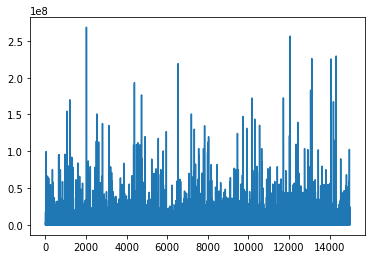

In [393]:
plt.plot(data)

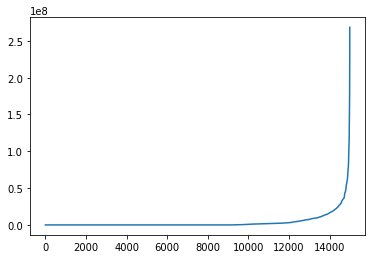

In [394]:
plt.plot(data_ordered)

In [389]:
len(np.unique(data))

4244

In [390]:
len(data)

15000

In [388]:
data = outcomes['Expected Annual Damage']
np.percentile(data, 10)

0.0

In [367]:
np.percentile(data, 90)

2242915780.1053104

In [323]:
from ema_workbench.analysis import prim

In [319]:
prim.Prim??

In [396]:
data = outcomes['Expected Annual Damage']

y = data > np.percentile(data, 95)

prim_alg = prim.Prim(experiments_uncertainties,y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 15000 points remaining, containing 750 cases of interest
[MainProcess/INFO] mean: 0.8068783068783069, mass: 0.0504, coverage: 0.8133333333333334, density: 0.8068783068783069 restricted_dimensions: 1


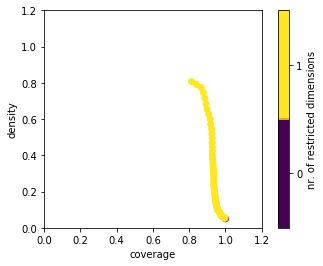

In [397]:
box1.show_tradeoff()
plt.show()

In [251]:
#box1.inspect(style='graph')
#plt.show()

In [252]:
#box1.inspect(-1)

In [253]:
#box1.inspect(25, style='graph')
#plt.show()

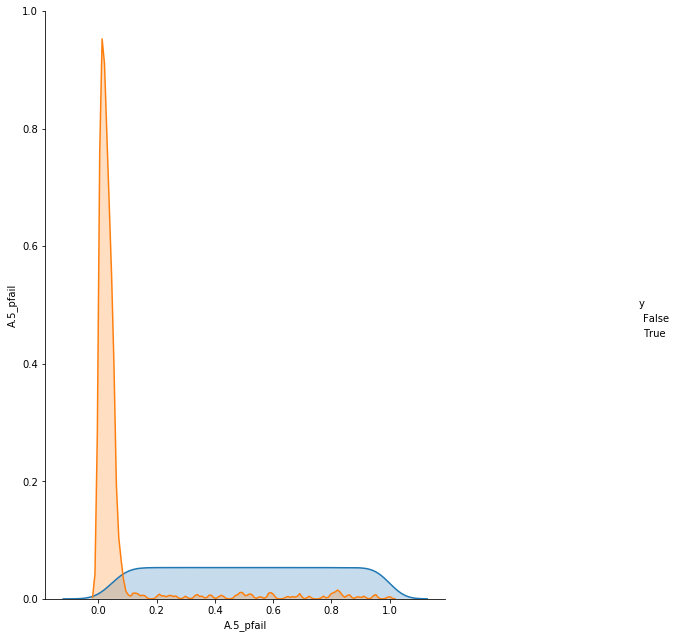

In [398]:
from ema_workbench.analysis import dimensional_stacking
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


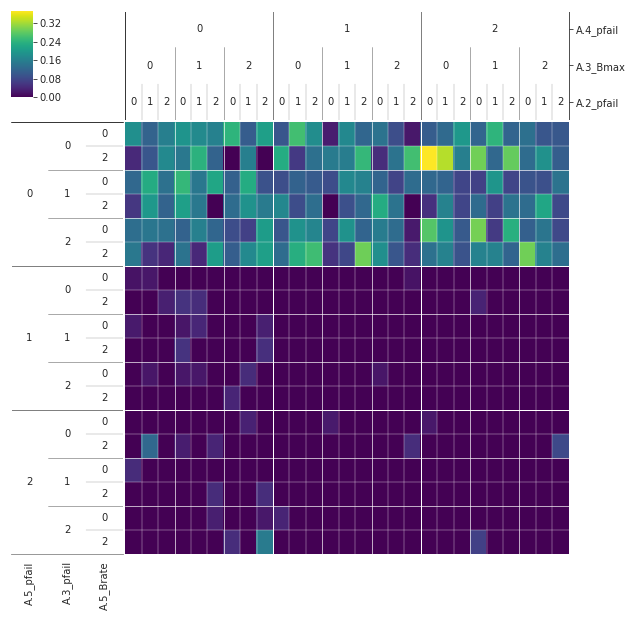

In [399]:
data = outcomes['Expected Annual Damage']

y = data > np.percentile(data, 95)

dimensional_stacking.create_pivot_plot(experiments_uncertainties, y,nbins=3, nr_levels=3)
#plt.savefig('Worst-ExpectedAnnualDamage-15000s-1p.png')
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


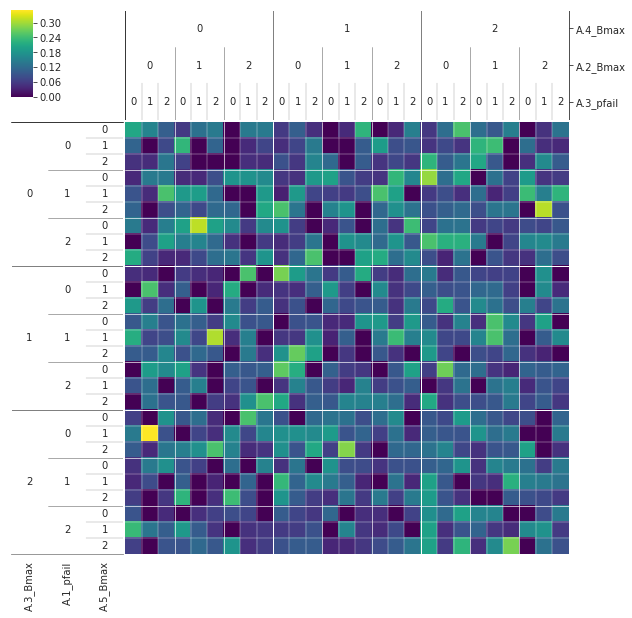

In [406]:
data = outcomes['Total Investment Costs']

y = data > np.percentile(data, 90)

dimensional_stacking.create_pivot_plot(experiments_uncertainties, y,nbins=3, nr_levels=3)
#plt.savefig('Worst-TotalInvestmentCosts-15000s-1p.png')
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


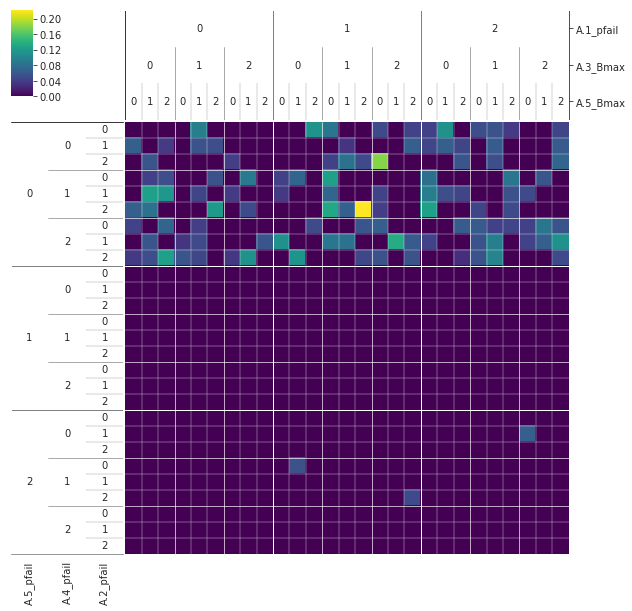

In [404]:
data = outcomes['Expected Number of Deaths']

y = data > np.percentile(data, 99)

dimensional_stacking.create_pivot_plot(experiments_uncertainties, y,nbins=3, nr_levels=3)
#plt.savefig('Worst-ExpectedNumberOfDeaths-15000s-1p.png')
plt.show()


In [245]:
list(experiments_uncertainties)

['A.0_ID flood wave shape',
 'A.1_Bmax',
 'A.1_Brate',
 'A.1_pfail',
 'A.2_Bmax',
 'A.2_Brate',
 'A.2_pfail',
 'A.3_Bmax',
 'A.3_Brate',
 'A.3_pfail',
 'A.4_Bmax',
 'A.4_Brate',
 'A.4_pfail',
 'A.5_Bmax',
 'A.5_Brate',
 'A.5_pfail',
 'policy',
 'model']

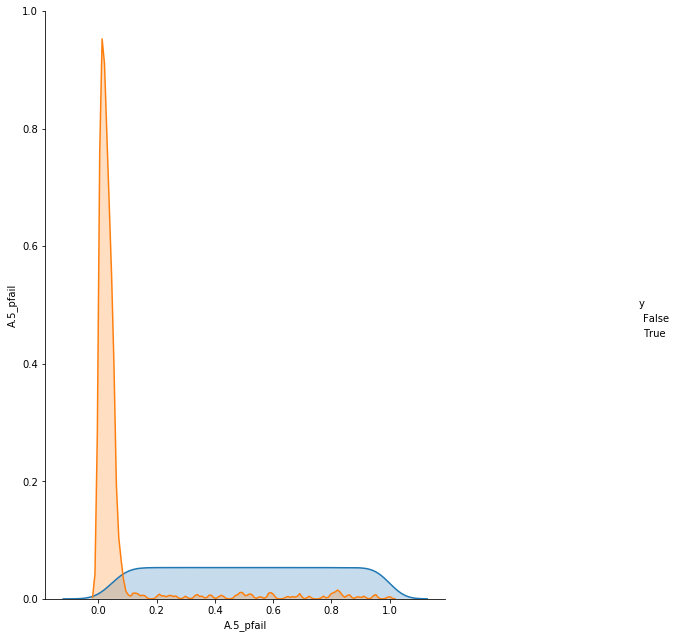

In [403]:
box1.select(-1)
fig = box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [299]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 14162 points remaining, containing 662 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.6547144754316069, returning dump box


In [302]:
from ema_workbench.analysis import cart
cart_alg = cart.CART(experiments_uncertainties,y, 0.05)
cart_alg.build_tree()

In [316]:
import pydotplus
import pydot

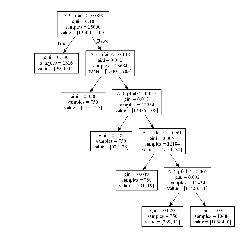

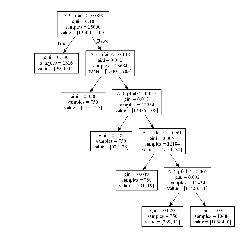

In [317]:
cart_alg.show_tree()

In [321]:
prim.show_boxes_individually(boxes, results, uv=[], filter=True)

AttributeError: module 'ema_workbench.analysis.prim' has no attribute 'show_boxes_individually'

In [ ]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=50)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 50 policies * 1 model(s) = 50000 experiments
